In [1]:
import os
os.chdir("E:\\HH\\Project")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
pd.set_option('display.max_columns', None) 

## Fraud Detection analysis for creditcard dataset

In [9]:
df = pd.read_csv("creditcard.csv")

In [10]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## EDA

In [14]:
df.agg(['size','count','nunique'])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
size,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807
count,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807
nunique,124592,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,275663,32767,2


<function matplotlib.pyplot.show(*args, **kw)>

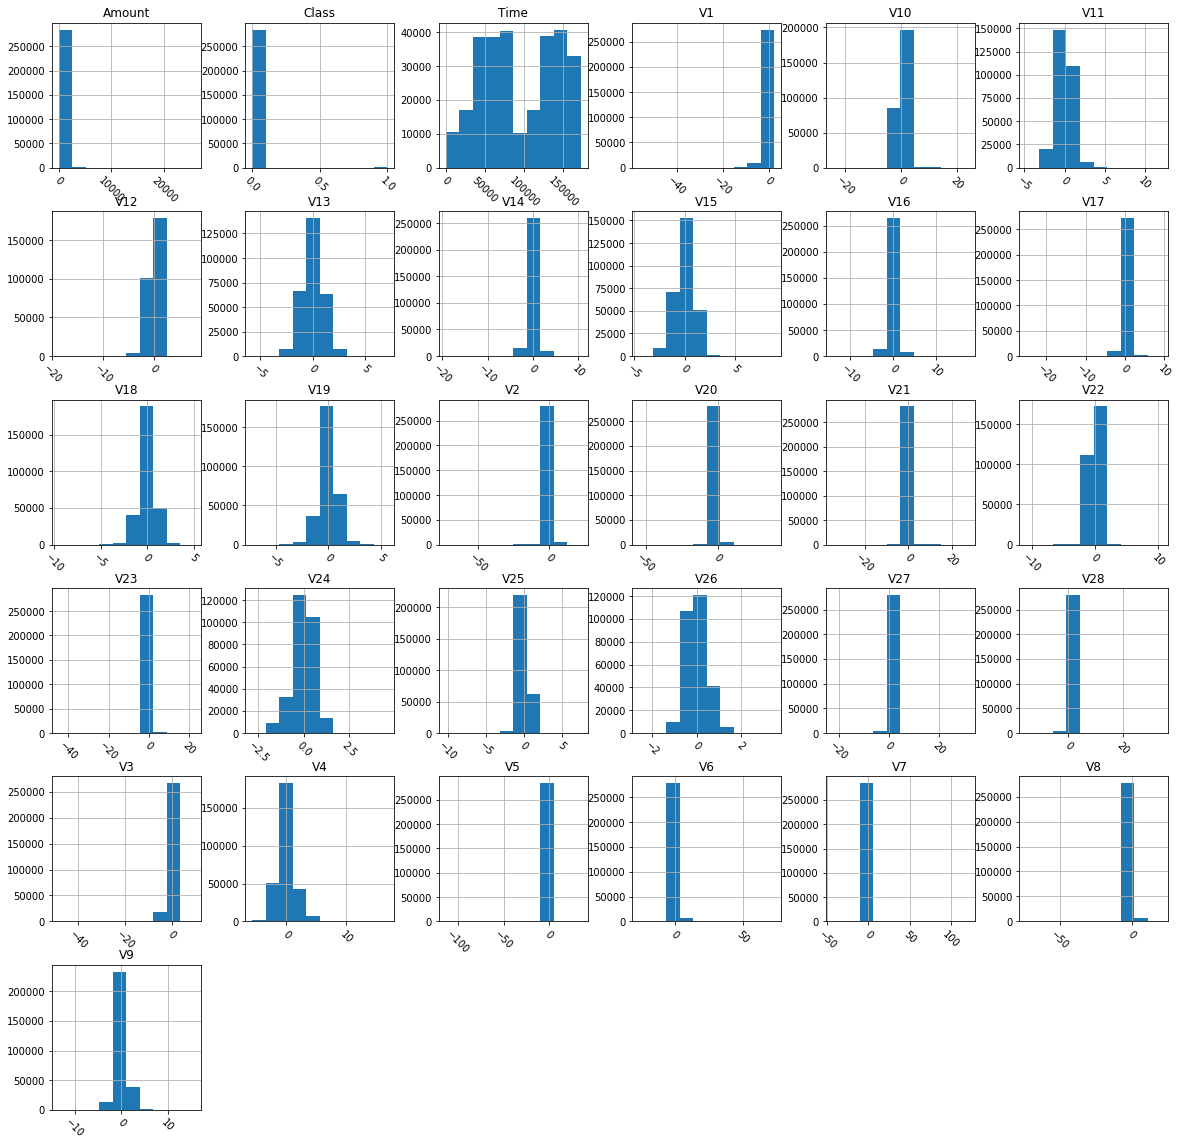

In [55]:
df.hist(figsize=(20,20),xrot = -45,bins = 10)
plt.show

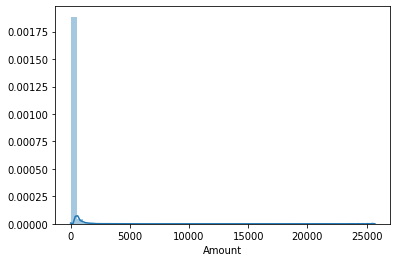

In [57]:
sns.distplot(df['Amount'])

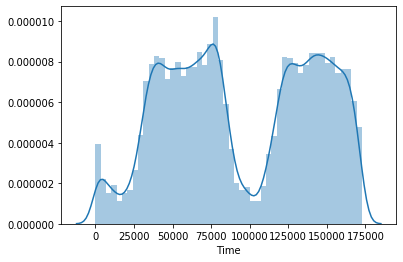

In [58]:
sns.distplot(df['Time'])

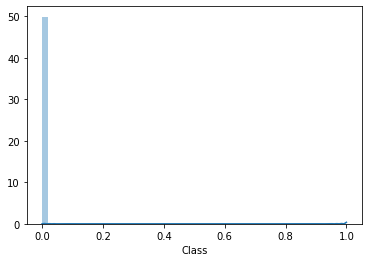

In [59]:
sns.distplot(df['Class'])

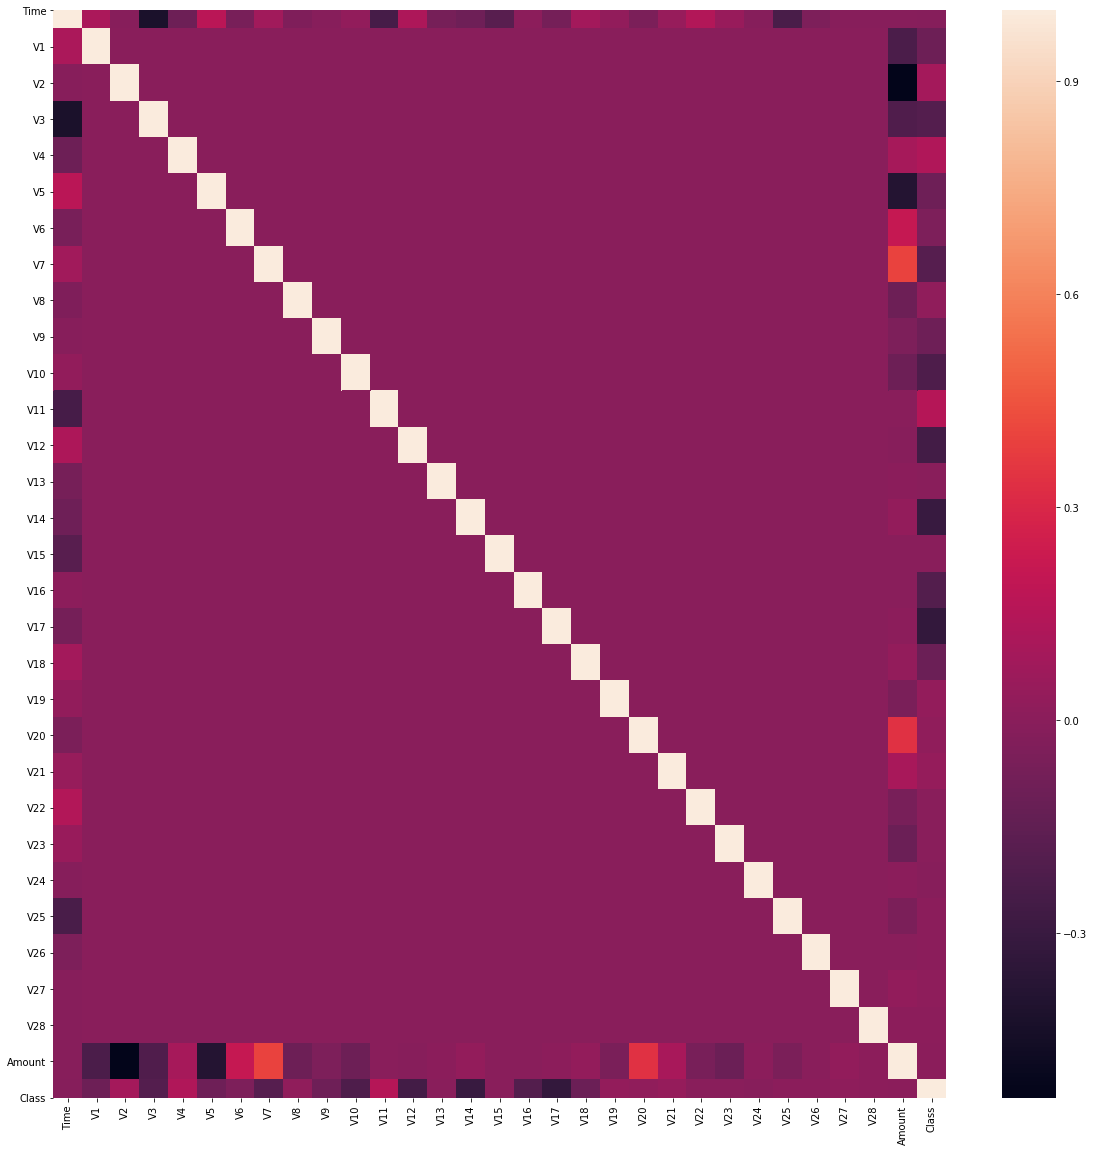

In [28]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr())

In [23]:
X = df.iloc[:,:-1]

In [25]:
Y = df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(solver = 'lbfgs')
logisticreg = logisticreg.fit(x_train,y_train)

In [31]:
y_pred = logisticreg.predict(x_test)

In [45]:
from sklearn import metrics
lr_accuracy = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy is :",lr_accuracy)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Accuracy is : 99.83673326077034
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962

[[56864     0]
 [   93     5]]


## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
y_pred = knn.predict(x_test)

In [44]:
knn_accuracy = metrics.accuracy_score(y_test,y_pred)*100
print("knn Accuracy is :",knn_accuracy)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

knn Accuracy is : 99.83673326077034
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962

[[56864     0]
 [   93     5]]


## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state=100)
dtc_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [34]:
y_pred = dtc_entropy.predict(x_test)

In [46]:
dtc_accuracy = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy is :",dtc_accuracy)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Accuracy is : 99.83673326077034
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962

[[56864     0]
 [   93     5]]


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(x_train,y_train)

In [37]:
y_pred = rfc.predict(x_test)

In [48]:
rfc_accuracy = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy is :",rfc_accuracy)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Accuracy is : 99.83673326077034
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962

[[56864     0]
 [   93     5]]


## Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc = nbc.fit(x_train,y_train)

y_pred = nbc.predict(x_test)


# checking accuracy
nbc_accuracy = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy is :",nbc_accuracy)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Accuracy is : 99.30128857835048
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962

[[56502   362]
 [   36    62]]


In [53]:


Accuracy_Matrix = pd.DataFrame(['Logistic Regression',
                                'KNN',
                                'Decision Tree',
                                'Random Forest',
                                 'Naive Bayes',
                                 ])

Actual_Data = pd.DataFrame(([lr_accuracy,
                             knn_accuracy,
                             dtc_accuracy,
                             rfc_accuracy,
                             nbc_accuracy,
                             ]))
Accuracy_Matrix['Accuracy'] = Actual_Data[0]



Accuracy_Matrix.rename(columns = {0:'Algorithms'},inplace = True)
Accuracy_Matrix


,Algorithms,Accuracy
0,Logistic Regression,99.836733
1,KNN,99.836733
2,Decision Tree,99.836733
3,Random Forest,99.836733
4,Naive Bayes,99.301289


** 62 Fraud credit cards detected